In [1]:
import pandas as pd
import numpy as np
import re 
news = pd.read_csv('data/struc_virality.csv')
news.head()

,Unnamed: 0,authorDic,edges,keyUser,layerNum,rpsttimeline,status,weiboID,repost_user_ids,id,struc_virality,repostNum,label
0,0,"{'province': '11', 'weiboText': '远去的大师', 'scre...",{},{'4010120209906916': 'http://tva3.sinaimg.cn/c...,"[0, 0, 0, 0, 0, 0]","[['2014-12-31 22:50:00', 0], ['2014-12-31 23:0...",1,3793976291216967,[],1943724947,0.000000,0,true
1,1,"{'province': '11', 'weiboText': '中国青年女科学家奖十周年纪...",{'3658686746755393': {'posttime': 'Mon Dec 23 ...,{'4010120209906916': 'http://tva3.sinaimg.cn/c...,"[2, 0, 0, 0, 0, 0]","[['2013-12-18 11:00:00', 1], ['2013-12-18 11:1...",1,3656813583185243,"['3880085981', '1098289271']",1791353831,1.333333,2,true
2,2,"{'province': '11', 'weiboText': '【民办教师首次纳入职评体系...",{},{'4006787155492653': 'http://tva3.sinaimg.cn/c...,"[0, 0, 0, 0, 0, 0]","[['2016-04-19 09:00:00', 0], ['2016-04-19 09:1...",1,3965901743766209,[],1864313207,0.000000,0,true
3,3,"{'province': '22', 'weiboText': '转发微博', 'scree...",{},{'4010300573400632': 'http://tva1.sinaimg.cn/c...,"[0, 0, 0, 0, 0, 0]","[['2016-02-23 09:10:00', 0], ['2016-02-23 09:2...",1,3945608626241268,[],1765230662,0.000000,0,true
4,4,"{'province': '64', 'weiboText': '转发微博', 'scree...",{},{'4010300573400632': 'http://tva1.sinaimg.cn/c...,"[0, 0, 0, 0, 0, 0]","[['2016-08-19 09:50:00', 0], ['2016-08-19 10:0...",1,4010124030948666,[],1882632930,0.000000,0,true


In [2]:
true_news = news[news['label']=='true']
fake_news = news[news['label']=='fake']

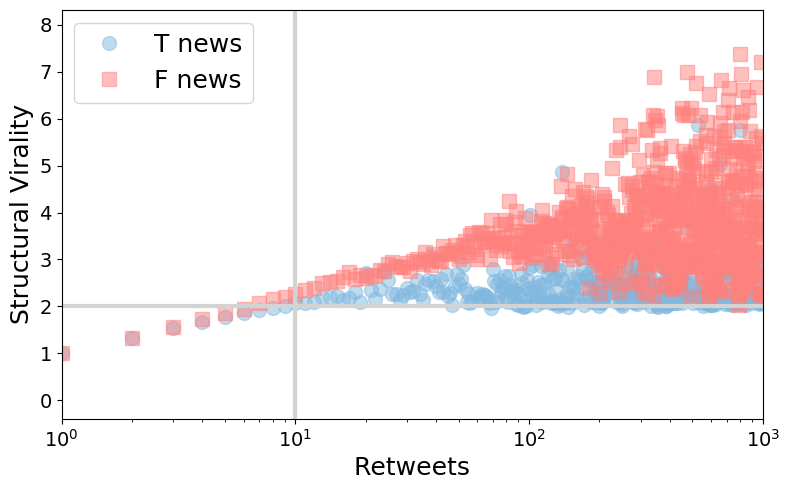

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')
font1 = {
    'weight': 'normal',
    'size': 18
}
plt.figure(figsize=(8,5))
labels = ['T news', 'F news']
markers = ['o', 's']
colors = ['#81B8DF', '#FE817D']
news_list = [true_news, fake_news]
for i in range(2):
    x = news_list[i].groupby('repostNum').mean().index.get_values()
    y = news_list[i].groupby('repostNum').mean()['struc_virality']
    plt.plot(x, y,linewidth=0, marker=markers[i], color=colors[i], label=labels[i], alpha=0.5, markersize=10)
plt.xscale('log')
plt.xlabel('Retweets',font1)
plt.ylabel('Structural Virality',font1)
plt.axhline(y=2, lw=3, c='lightgrey')
plt.axvline(x=1e1, lw=3, c='lightgrey')
plt.xlim(1e0,1e3)
plt.tick_params(labelsize=14)
plt.legend(prop=font1)
plt.tight_layout()
plt.savefig('images/StructuralVirality.pdf')
plt.savefig('images/StructuralVirality.jpg', dpi=600)
plt.show()

In [45]:
from scipy.stats import ks_2samp

ks_2samp(true_news['struc_virality'], fake_news['struc_virality'])

Ks_2sampResult(statistic=0.15884084256417097, pvalue=4.230359493964617e-152)

In [3]:
sub_true = true_news[true_news['repostNum']<10]
sub_fake = fake_news[fake_news['repostNum']<10]

In [5]:
sub_true[sub_true['struc_virality']<2].shape[0]/sub_true.shape[0]

0.9815869170199879